<a href="https://colab.research.google.com/github/ZikrullaRaxmatov/Zako_AI_Lessons/blob/main/MachineLearning_M2_4_GaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

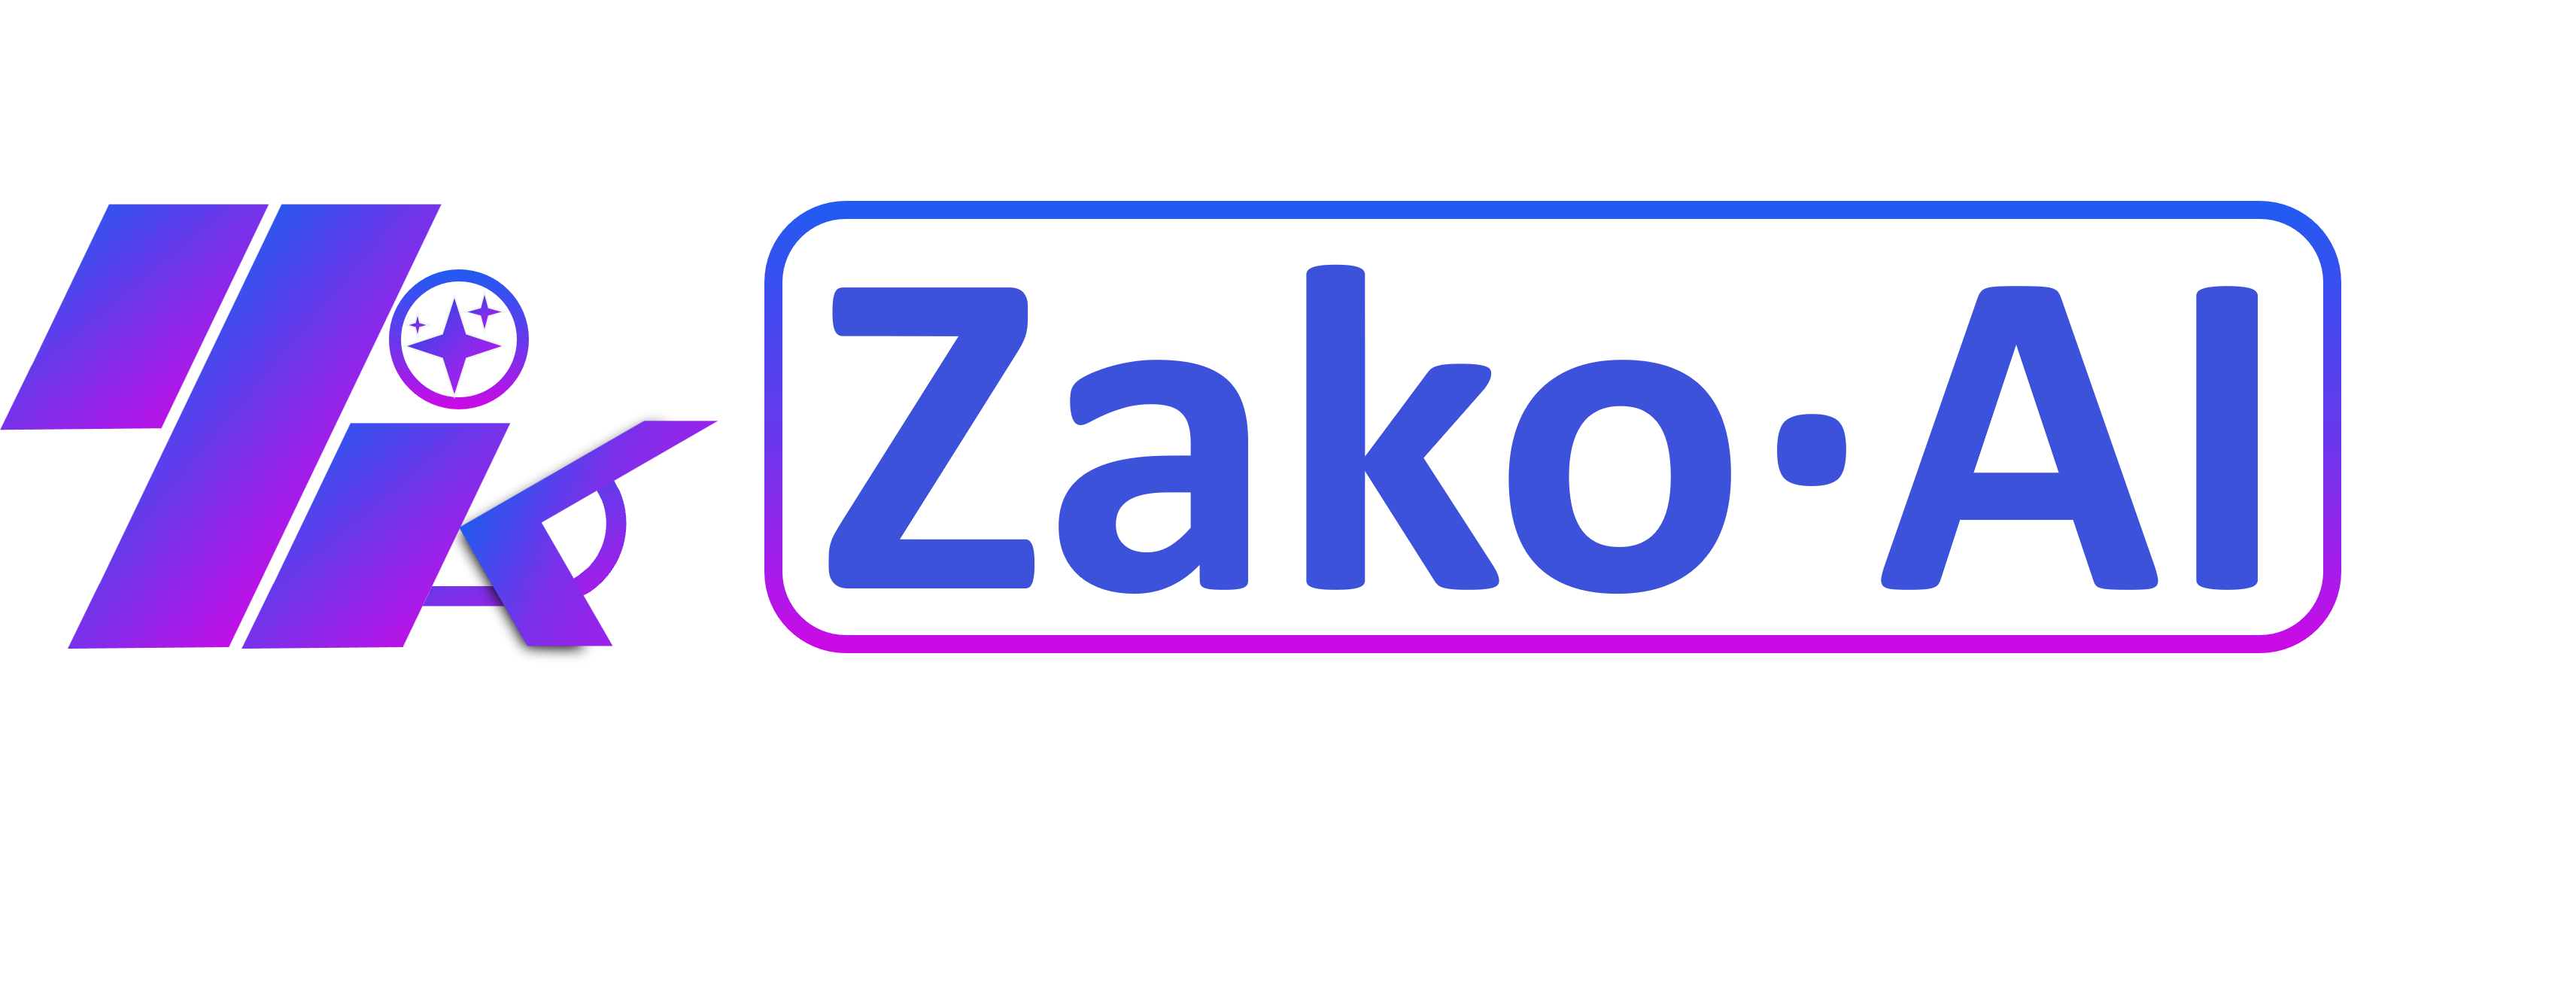

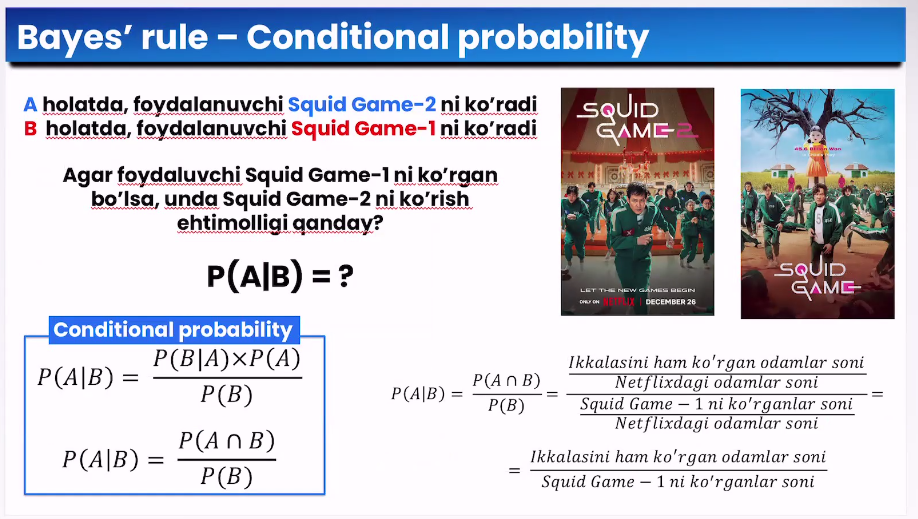

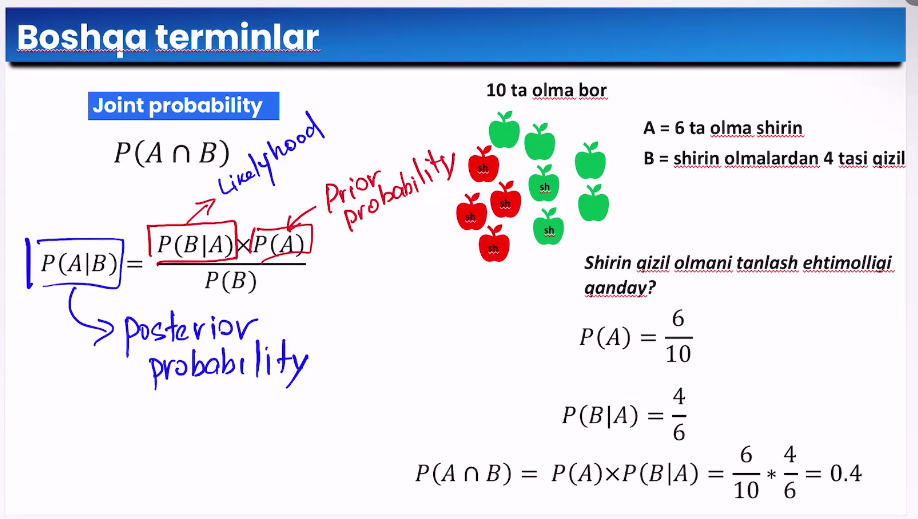

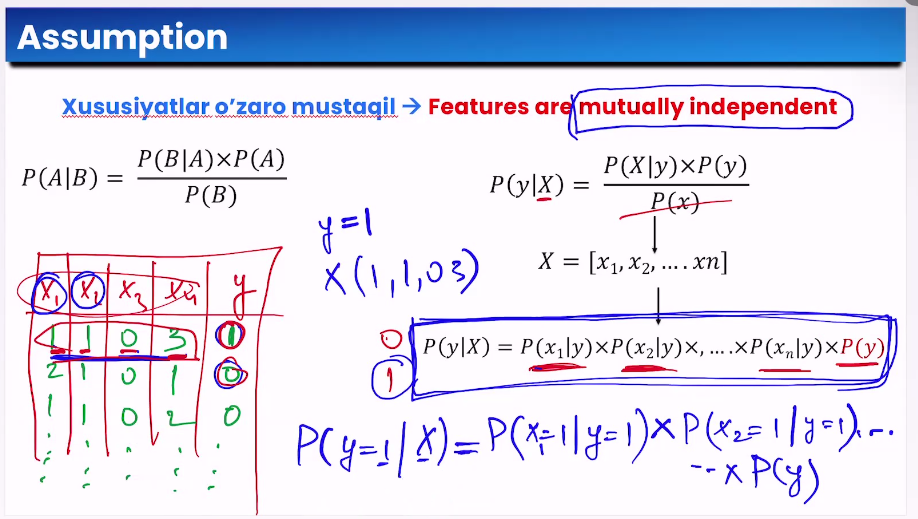

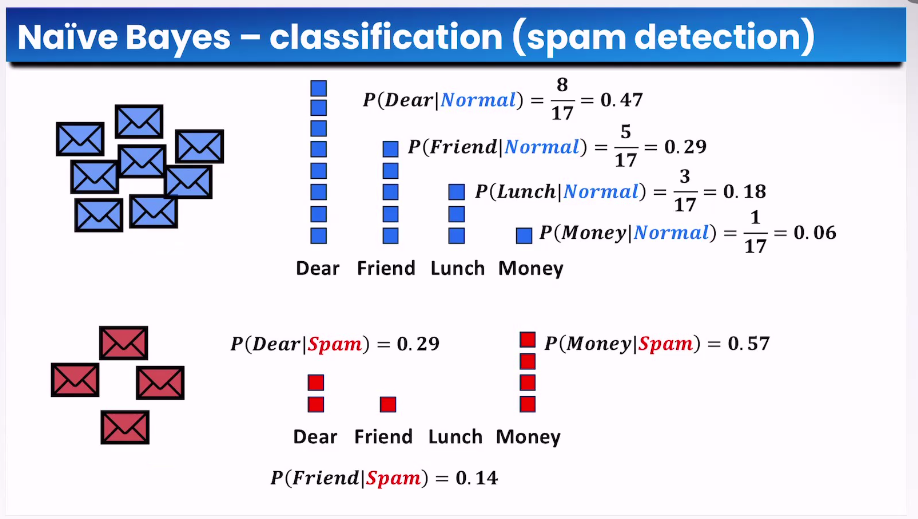

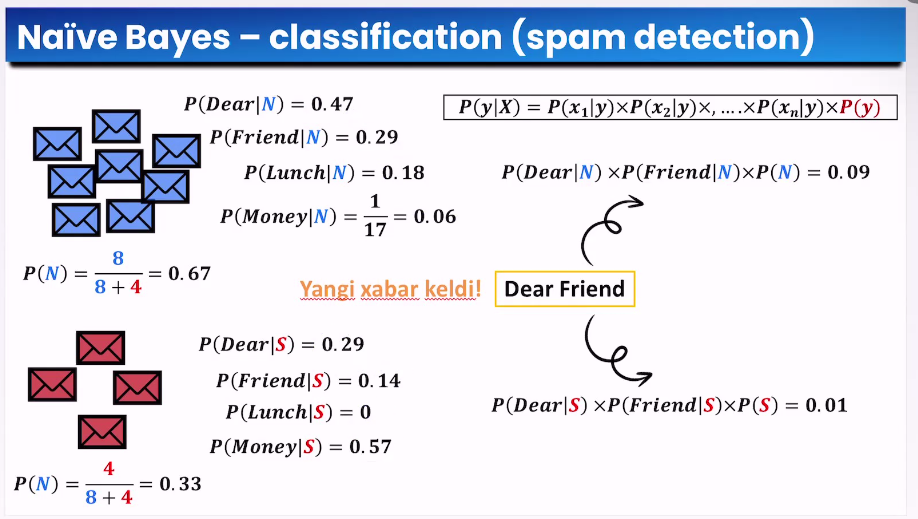

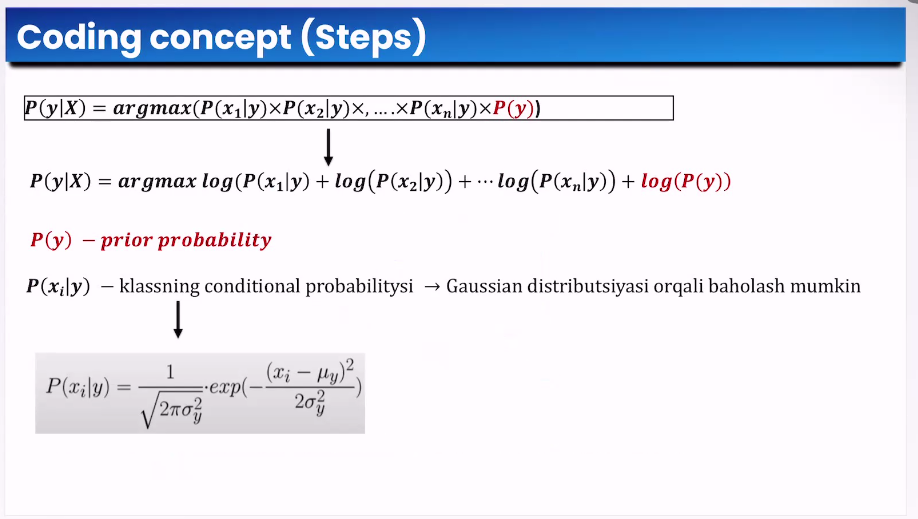

In [ ]:
import pandas as pd

# Load the generated dataset
df = pd.read_csv("Synthetic_movie_dataset_200_users.csv")

# Function to calculate conditional probability for each user
def calculate_user_conditional_probabilities(movie_column, target_column):
    # Calculate the overall P(Movie) for the dataset
    total_users = len(df)
    p_movie = df[movie_column].sum()    # P(Movie)

    # Calculate P(Movie and SquidGame-2)
    joint_prob = ((df[movie_column] == 1) & (df[target_column] == 1)).sum()   # P(Movie and SquidGame-2)

    # For each user, calculate the conditional probability P(SquidGame-2 | Movie)
    prob_column = []
    for _, row in df.iterrows():
        if row[movie_column] == 1:  # Only calculate for users who watched the given movie
            prob = joint_prob / p_movie
        else:
            prob = 0  # If the user didn't watch the movie, the conditional probability is 0
        prob_column.append(prob)

    return prob_column

# List of columns for the movies (excluding SquidGame-2)
movies = ['SquidGame-1', 'The8Show', 'Hellbound', 'AliceInBorderland']

# Calculate conditional probabilities for each user and each movie
for movie in movies:
    df[f'P(SquidGame-2 | {movie})'] = calculate_user_conditional_probabilities(movie, 'SquidGame-2')

# Display the dataset with the calculated conditional probabilities for each user
print(df[['User_ID'] + [f'P(SquidGame-2 | {movie})' for movie in movies]].head())

# Optionally, save to CSV for further use
df.to_csv("user_conditional_probabilities_squidgame.csv", index=False)


In [ ]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_classification(
        n_samples=1000, n_features=10, n_classes=2, random_state=123
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)

    print("Naive Bayes classification accuracy", accuracy(y_test, predictions))